In [1]:
import utils
import importlib

importlib.reload(utils)

<module 'utils' from '/home/n/nath/cGAN/shruti/xarray_batcher/utils.py'>

In [2]:
import get_fcst_and_truth as gfat
import importlib

importlib.reload(gfat)

df_vars, df_truth, df_constants = gfat.get_all([2018,2019], model='ifs')

/home/n/nath/nobackup/anaconda3/envs/kerchunk_2024/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracted all 14 variables in ---- 160.18930625915527 s---- for year 2018
Extracted all 14 variables in ---- 179.6889193058014 s---- for year 2019
Now doing truth values


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 244/244 [00:20<00:00, 12.12it/s]


Finished retrieving truth values in ---- 21.145869970321655 s---- for year 2019


/home/n/nath/nobackup/anaconda3/envs/kerchunk_2024/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/n/nath/nobackup/anaconda3/envs/kerchunk_2024/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/n/nath/nobackup/anaconda3/envs/kerchunk_2024/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/n/nath/nobackup/anaconda3/envs/kerchunk_2024/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [ ]:
import torch_batcher as tb
import importlib
importlib.reload(tb)


data_gen = tb.BatchDataset(df_vars, df_truth, df_constants, batch_size=[4,128,128])

In [41]:
data_gen.sampler.__len__()

4880

In [29]:
for d in data_gen:
    break

In [30]:
data_gen.__len__()

4880

In [13]:
d[0].shape

torch.Size([4, 128, 128, 58])

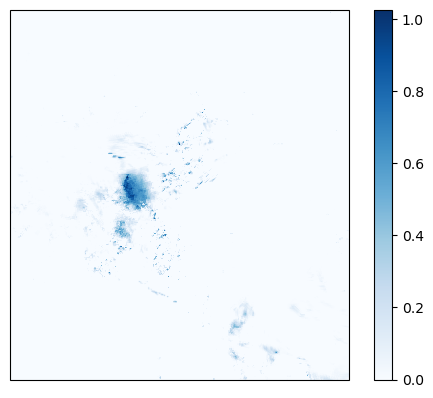

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import xarray as xr
import numpy as np


TRUTH_PATH = '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/'
data_path = glob.glob(TRUTH_PATH+"*.nc4")

ds = xr.open_mfdataset(data_path[0])
#print(ds)

lat_reg_IMERG = ds.lat.values
lon_reg_IMERG = ds.lon.values

ax = plt.axes(projection = ccrs.PlateCarree())

mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, np.squeeze(df_truth.isel({"time":[-40]}).precipitation.values), cmap='Blues')
#mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, np.squeeze(df_vars[11].isel({"time":[-40],"i_x":[0]}).tp.values), cmap='Blues')
plt.colorbar(mesh)

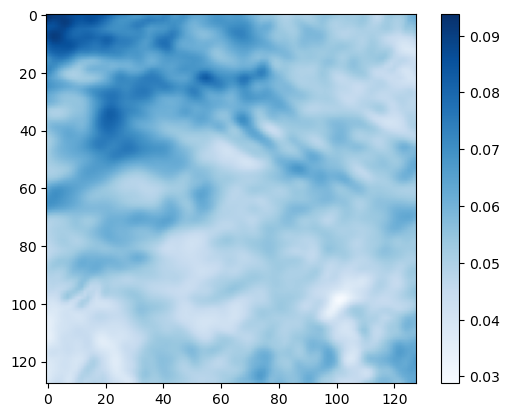

In [16]:
mesh = plt.imshow(d[0][1,:,:,-3],cmap="Blues")
plt.colorbar(mesh)

In [ ]:
import os
import time
year=2020

if not os.path.exists('/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/netcdf/%i'%year):
    os.makedirs('/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/netcdf/%i'%year)

start_time = time.time()
df_vars[0].to_zarr('/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/netcdf/%i/%s.zarr'%(year,df_vars[0]['field'].values[0]))
print('Finished saving in ----',time.time()-start_time,'s----')

In [154]:
import glob
import xarray as xr
import dask

files = glob.glob('/network/group/aopp/predict/TIP022_NATH_GFSAIMOD/netcdf/%i/*.zarr'%year)

def open_mfzarr(file_names, dim):
    def modify(ds):
        # modify ds here
        return ds
    # this is basically what open_mfdataset does
    open_kwargs = dict(decode_cf=True, decode_times=True)
    open_tasks = [dask.delayed(xr.open_dataset)(f, **open_kwargs) for f in file_names]
    tasks = [dask.delayed(modify)(task) for task in open_tasks]
    datasets = dask.compute(tasks)  # get a list of xarray.Datasets
    combined = datasets[0]  # or some combination of concat, merge
    return combined

ds = open_mfzarr(files,'field')



In [160]:
ds[0]

<xarray.Dataset> Size: 3GB
Dimensions:                        (field: 1, time: 1420, i_x: 4, lat: 384,
                                    lon: 352)
Coordinates:
  * field                          (field) object 8B 'cape'
  * i_x                            (i_x) int64 32B 0 1 2 3
  * lat                            (lat) float32 2kB -13.65 -13.55 ... 24.65
  * lon                            (lon) float32 1kB 19.15 19.25 ... 54.15 54.25
  * time                           (time) datetime64[ns] 11kB 2020-01-02T06:0...
Data variables:
    __xarray_dataarray_variable__  (field, time, i_x, lat, lon) float32 3GB ...

In [18]:
import get_fcst_and_truth as gfat
import importlib

importlib.reload(gfat)

df_vars = gfat.get_all([2024], model='gfs', ignore_truth=True)


Getting all variables for years:  [2024]
Creating consolidated file for variable Convective available potential energy
['2024-08-24T00:00:00.000000000' '2024-08-25T00:00:00.000000000'
 '2024-08-26T00:00:00.000000000' '2024-08-27T00:00:00.000000000'
 '2024-08-28T00:00:00.000000000' '2024-08-29T00:00:00.000000000'
 '2024-08-30T00:00:00.000000000' '2024-08-31T00:00:00.000000000']
Creating consolidated file for variable Convective precipitation (water)
['2024-08-24T00:00:00.000000000' '2024-08-25T00:00:00.000000000'
 '2024-08-26T00:00:00.000000000' '2024-08-27T00:00:00.000000000'
 '2024-08-28T00:00:00.000000000' '2024-08-29T00:00:00.000000000'
 '2024-08-30T00:00:00.000000000' '2024-08-31T00:00:00.000000000']
Creating consolidated file for variable Surface pressure
['2024-08-24T00:00:00.000000000' '2024-08-25T00:00:00.000000000'
 '2024-08-26T00:00:00.000000000' '2024-08-27T00:00:00.000000000'
 '2024-08-28T00:00:00.000000000' '2024-08-29T00:00:00.000000000'
 '2024-08-30T00:00:00.000000000' '

In [53]:
df_vars[0]

<xarray.Dataset> Size: 2GB
Dimensions:  (lon: 352, lat: 384, time: 976, i_x: 4)
Coordinates:
  * lon      (lon) float32 1kB 19.15 19.25 19.35 19.45 ... 54.05 54.15 54.25
  * lat      (lat) float32 2kB -13.65 -13.55 -13.45 -13.35 ... 24.45 24.55 24.65
  * time     (time) datetime64[ns] 8kB 2018-03-01 ... 2019-06-30T18:00:00
  * i_x      (i_x) int64 32B 0 1 2 3
Data variables:
    cape     (time, lat, lon, i_x) float32 2GB -0.01033 -0.01068 ... -0.1151

In [ ]:
import get_fcst_and_truth as gfat
import importlib

importlib.reload(gfat)

df_vars, df_truth, df_constants = gfat.get_all(2020, generator=False)


In [7]:
import time

import batcher
import importlib

importlib.reload(batcher)
from batcher import batch_from_zarr_store, zarr_store_loader, CustomTFDataset

batch_gen_train = iter(batch_from_zarr_store(df_vars, df_truth.drop_duplicates("time"), df_constants, hourly=True))
data_gen_valid = iter(zarr_store_loader(df_vars, df_truth.drop_duplicates("time"), df_constants, batch_size=1, full=True, hourly=True))



In [388]:
len(df_vars[0])

311

In [8]:
start_time = time.time()
val_data = next(batch_gen_train)
print(time.time()-start_time)


57825
63.01375412940979


In [323]:
import numpy as np
x = np.ones([1,30,40])

xx = np.hstack((x.reshape(1,-1,30,40), x.reshape(1,-1,30,40)))

xx.shape


(1, 2, 30, 40)

In [9]:
val_data[1]['output'].shape

TensorShape([2, 128, 128, 1])

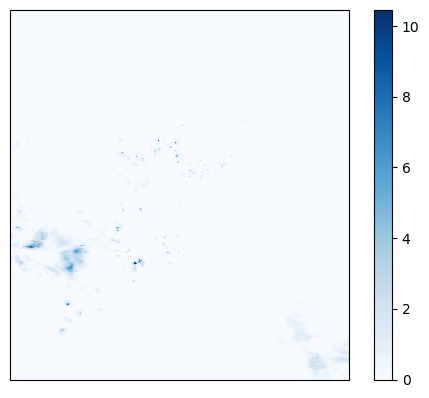

In [378]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import glob
import xarray as xr

import sys 
sys.path.insert(1,'../')

import data

TRUTH_PATH = '/network/group/aopp/predict/TIP018_HARRIS_TENSORFL/IMERG-regICPAC-6hr/'
data_path = glob.glob(TRUTH_PATH+"*.nc4")

ds = xr.open_mfdataset(data_path[0])
#print(ds)

lat_reg_IMERG = ds.lat.values
lon_reg_IMERG = ds.lon.values

ax = plt.axes(projection = ccrs.PlateCarree())

mesh = ax.pcolormesh(lon_reg_IMERG, lat_reg_IMERG, data.denormalise(val_data[1]['output'][0,:,:]), cmap='Blues')
plt.colorbar(mesh)

In [367]:
data.denormalise(val_data[0]['lo_res_inputs'][0,:,:,44])

array([[0.        , 0.        , 0.        , ..., 0.8904494 , 0.6508293 ,
        0.57791495],
       [0.        , 0.        , 0.        , ..., 0.9375001 , 0.69805276,
        0.625     ],
       [0.        , 0.        , 0.        , ..., 0.9375001 , 0.69805276,
        0.625     ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [293]:
start_time = time.time()
val_data = next(batch_gen_train)
print(time.time()-start_time)


87.32743191719055


In [294]:
val_data[0]["lo_res_inputs"].shape

TensorShape([2, 128, 128, 56])

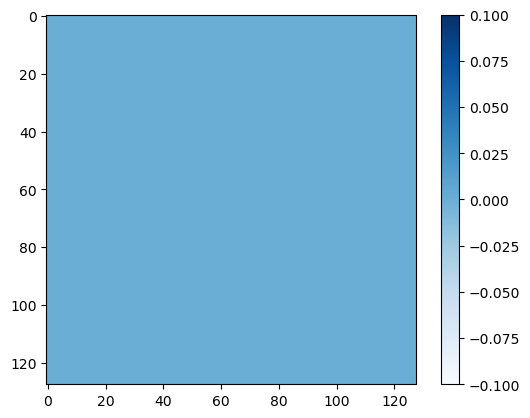

In [301]:
mesh = plt.imshow(val_data[0]["lo_res_inputs"][1,:,:,4],cmap="Blues")
plt.colorbar(mesh)

In [127]:

!python3 /home/n/nath/cGAN/shruti/main.py --config config.yaml --eval_short --evaluate --batch_gen_train batch_gen_train --data_gen_valid data_gen_valid 



Traceback (most recent call last):
  File "/home/n/nath/cGAN/shruti/main.py", line 13, in <module>
    import data
  File "/home/n/nath/cGAN/shruti/data.py", line 9, in <module>
    from kerchunk.zarr import ZarrToZarr
ModuleNotFoundError: No module named 'kerchunk'


In [52]:
import numpy as np
list(np.arange('2020-03-01','2020-03-03', dtype='datetime64[D]'))

[numpy.datetime64('2020-03-01'), numpy.datetime64('2020-03-02')]

In [84]:
1//4

0